# Portfolio Methodolgy

1. DGI/Growth Names - Rebalance every 6 months picking around 2 - 3 names from CA and US universe
    - Sell Covered Calls on names and re-enter if called away.
    - **GTC Stop Limit of 5% on each name**
2. VAA/PAA - Rebalance every month on trading day 1
3. LEAPS - Rebalance every 3 months picking around 3 - 8 names from US universe (high growth potential names)
    - Current Holdings: LOPE STOR PNW SBUX
    - LOPE Earnings: Nov 8
    - PNW Earnings: Nov 8
    - SBUX Earnings: Jan 23
        - **Exit Criteria: When the call option drops below 60 delta**
4. Short Vol - Short SPX Spreads at the beginning of the month and hold until second or last week to maturity
    - Potentially long UVXY/VXX puts at beginning of the month with bracket orders
    - **Short ATM SPX Put spreads around 25 points wide**
        - **Long bi-weekly unit puts, around -7% or so of SPX spot (or something with a cost of 15% of the credit)**
        - **The SPX put spread will have a capped max loss of 2,500 per contract, while in low volatility, the bi-weekly units are severely underpriced and will explode 10X to 20X in value if the long strike in the spread gets tested. Vega and Gamma play a huge factor in the repricing of these units.**
        - Initiate the units every 2 weeks letting them run to expiry
    - ***When in lower vol environment or when skew is less pronounced in high vol environments, it is possible to select spreads and units with the same expiry and still receive a deccent net credit. Otherwise, when IV is very high, check if same expiries are possible, otherwise choose units that expire in half the time.***
5. Barbell Hedging
    - Long SPX puts or VIX calls during high crisis potential moments
        - Initiate bracket orders with SPX Puts: +/- 30% of Cost Basis
    - Check VIX Futures volume trends and see impact of Feb 5, 2018
    - Only trade 4 naked SPX puts in Reg accounts
        - Sell half into profits/losses 
    - Only trade 6 3:1 Put back ratios in Reg Account: Leg into these positions because of how illiquid the market is
    - Take losses immediately (10% - 30% of Cost Basis)
    - NEVER EVER try to put on a position of the market is illiquid: YOU WILL get filled at horrible prices
    - **Put on 1-5 Delta strangles on the open of the day and close position at the end of the day around 2 pm to 3 pm**
6. Treasuries - Re-establish monthly bills beginning of month or at maturity
7. Earnings
    - Filter stocks with market cap > 500M and with post-earnings returns greater than 2% in magnitude for at least 3 quarters
    - Then filter stocks whose options have bid-ask spreads less than 1 dollar ATM
    - Aggregate all insider share buys and sells and calculate the ratio Buy/Sells
        - Candidates for Puts have Buy/Sell < 0.5
        - Candidates for Calls have Buy/Sell > 2

##### Strategy Weights
|Strategy|Weight|Last Rebal|Next Check|Next Full Rebal|
|-|-|-|-|-|
|VAA/PAA|25%|11/01/2018|12/01/2018|12/01/2018|
|LEAPs|5%|11/01/2018|12/01/2018|01/01/2019|
|Short Vol|2%|NA|NA|NA|
|Barbell Hedging|1.5%|11/06/2018|11/09/2018|11/19/2018|
|Treasuries|60%|11/01/2018|11/29/2018|12/01/2018|

## Key Modules to Run

- fundamental_data_collect.py to run monthly to collected latest financial statements and key stats from yahoo
- finstatement_cleaning.py to run right after fundamental_data_collect.py to create cleaned data for earnings plays



In [1]:
# Importing necessary models
import warnings
warnings.filterwarnings('ignore')

import smtplib
import pandas as pd
import numpy as np
import datetime as dt
import pandas.stats.moments as st
import time
%matplotlib inline
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

import os
main_dir = os.getcwd()

os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Trading\\Modules\\DataCollection')

from alphavantage import *
from yahoo_query import *
from option_slam_earnings import *
from reuters_query import reuters_query
from alphaquery import alphaquery

os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Trading\\Modules\\Options')
from optionsFunctions import *

os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Trading\\Modules\\Earnings')
from yahoo_earnings import *
from lookup_earnings import lookup_earnings

os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Trading\\Modules\\Processing')
from hv_calc import *

os.chdir(main_dir)

# Allocate Smartly Checking

In [2]:
# Short Call Assignment Price - 287.5

portfolio_value =  200000

as_lst = ['DBC',
        'HYG',
        'IEF',
        'IWM',
        'LQD',
        'QQQ',
        'SPY',
        'VNQ']
as_wgt = [0.014,
        0.014,
        0.417,
        0.014,
        0.500,
        0.014,
        0.014,
        0.014]

as_df = pd.DataFrame({'Allocation': as_wgt}, index = as_lst)
curr_spot = curr_batch_quotes(as_lst)
as_df = pd.concat([as_df,curr_spot[['price']]], axis = 1)

as_df['Market Value'] = portfolio_value*as_df.Allocation
as_df['Holdings'] = np.round(as_df['Market Value']/as_df.price,0)

as_df

Allocation    price  Market Value  Holdings
symbol                                             
DBC          0.014   15.635        2800.0     179.0
HYG          0.014   82.755        2800.0      34.0
IEF          0.417  101.265       83400.0     824.0
IWM          0.014  145.750        2800.0      19.0
LQD          0.500  111.335      100000.0     898.0
QQQ          0.014  159.190        2800.0      18.0
SPY          0.014  263.780        2800.0      11.0
VNQ          0.014   80.090        2800.0      35.0

## Checking market correlations

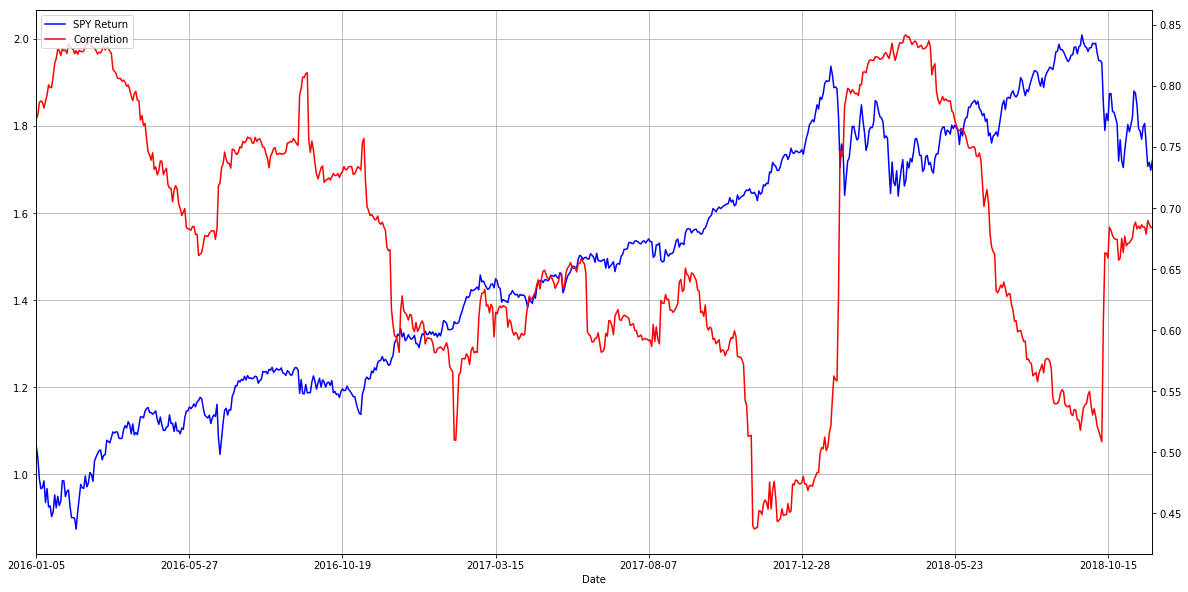

                XLRE       XLV       XLI       XLK       XLP       XLU  \
2018-11-19  0.375549  0.916751  0.875858  0.926255  0.432850  0.033189   
2018-11-20  0.401001  0.915507  0.880393  0.926242  0.465930  0.055807   
2018-11-21  0.401249  0.908165  0.880749  0.926445  0.456234  0.043590   
2018-11-23  0.405343  0.903898  0.880365  0.926059  0.452394  0.035683   
2018-11-26  0.399084  0.903288  0.876807  0.926613  0.444495  0.035809   

                 XLB       XLY       XLF       XLE  Avg_Corr   SPY_cum  
2018-11-19  0.784050  0.904896  0.799424  0.737701  0.678652  1.758232  
2018-11-20  0.789038  0.908603  0.806617  0.748874  0.689801  1.707188  
2018-11-21  0.790515  0.907478  0.806531  0.747581  0.686854  1.716413  
2018-11-23  0.789629  0.906843  0.809342  0.733773  0.684333  1.698270  
2018-11-26  0.793197  0.908157  0.811755  0.738282  0.683749  1.721025  


In [52]:
rolling_window = 60
plot_window = 10000

corr_df, sector_df = check_mkt_corr(rolling_window, plot_window)
print(corr_df.tail())

In [53]:
((sector_df.dropna() + 1).cumprod()-1).tail()

SPY      XLRE       XLV       XLI       XLK       XLP  \
2018-11-19 -0.023230  0.065079  0.070823 -0.032500 -0.081478  0.096161   
2018-11-20 -0.041307  0.051111  0.060806 -0.052574 -0.101218  0.077948   
2018-11-21 -0.038040  0.050476  0.054796 -0.045883 -0.094638  0.069330   
2018-11-23 -0.044465  0.046667  0.056328 -0.047795 -0.102898  0.073051   
2018-11-26 -0.036407  0.044762  0.061160 -0.047180 -0.094988  0.071289   

                 XLU       XLB       XLC       XLY       XLF       XLE  
2018-11-19  0.098227 -0.069072 -0.128903 -0.071659 -0.020841 -0.101418  
2018-11-20  0.093644 -0.085998 -0.140312 -0.092682 -0.042413 -0.130854  
2018-11-21  0.077505 -0.078646 -0.130104 -0.083199 -0.041682 -0.117206  
2018-11-23  0.078103 -0.088562 -0.141513 -0.087314 -0.049360 -0.144902  
2018-11-26  0.078502 -0.082749 -0.129704 -0.075684 -0.033437 -0.134868

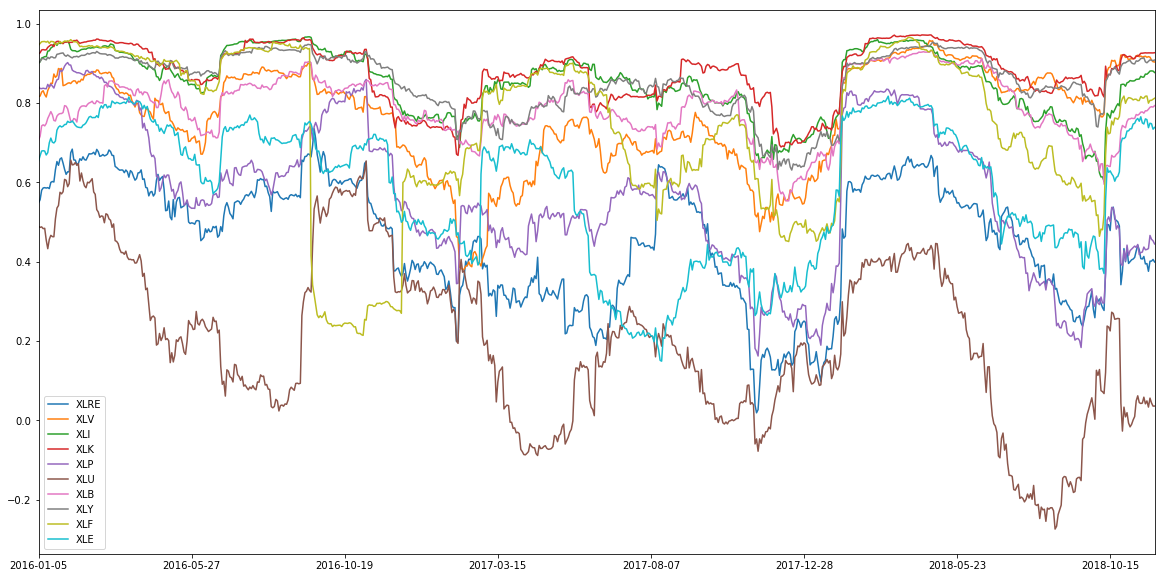

In [54]:
corr_df.iloc[:,:-2].plot(figsize = (20,10))

## Earnings

In [ ]:
date_lookup = '2018-11-21'

curr_earnings = date_earnings(date_lookup)
curr_earnings = curr_earnings[curr_earnings['Call Time'].isin(['After Market Close', 'Before Market Open'])]
curr_earnings['EarningsDate'] = date_lookup


In [92]:
month = 11
year = 2018
days_list = list(range(29, 31))

week_earnings = []

for i in days_list:
    date_lookup = '{0}-{1}-{2}'.format(year,month,i)
    curr_earnings = date_earnings(date_lookup)
    curr_earnings = curr_earnings[curr_earnings['Call Time'].isin(['After Market Close', 'Before Market Open'])]
    curr_earnings['EarningsDate'] = date_lookup
    week_earnings.append(curr_earnings)
    
curr_earnings = pd.concat(week_earnings,axis = 0)

focus_names = []
max_spread = 1

for ticker in curr_earnings.index:
    try:
        curr_options = all_options(ticker, 100, 1)
    except:
        curr_options = []
    
    if len(curr_options) == 0:
        continue
    elif (curr_options['Ask'] - curr_options['Bid']).mean() <= max_spread:
        focus_names.append(ticker)
    else:
        continue
        
curr_earnings = curr_earnings[curr_earnings.index.isin(focus_names)]

In [93]:
acs = curr_earnings[curr_earnings['Call Time'] == 'After Market Close']
bcs = curr_earnings[curr_earnings['Call Time'] == 'Before Market Open']
curr_earnings

Call Time EPS Estimate                        Name EarningsDate
ANF   Before Market Open          0.2  Abercrombie &amp; Fitch Co   2018-11-29
AMWD  Before Market Open         1.87      American Woodmark Corp   2018-11-29
PANW  After Market Close         1.05      Palo Alto Networks Inc   2018-11-29
AMBA  After Market Close         0.09               Ambarella Inc   2018-11-29
AVAV  After Market Close         0.16           AeroVironment Inc   2018-11-29
BIG   Before Market Open            -                Big Lots Inc   2018-11-29
PVH   After Market Close         3.14                    PVH Corp   2018-11-29
GME   After Market Close         0.57               GameStop Corp   2018-11-29
TECD  Before Market Open         2.17              Tech Data Corp   2018-11-29
DLTR  Before Market Open         1.14             Dollar Tree Inc   2018-11-29
HPQ   After Market Close         0.54                      HP Inc   2018-11-29
SPLK  After Market Close         0.32                  Splunk Inc   2018-11-29
VMW   After Market Close         1.52                  VMware Inc   2018-11-29
ZUO   After Market Close        -0.13                   Zuora Inc   2018-11-29
WDAY  After Market Close         0.14                 Workday Inc   2018-11-29
TITN  Before Market Open         0.36         Titan Machinery Inc   2018-11-29

In [94]:
acs 

Call Time EPS Estimate                    Name EarningsDate
PANW  After Market Close         1.05  Palo Alto Networks Inc   2018-11-29
AMBA  After Market Close         0.09           Ambarella Inc   2018-11-29
AVAV  After Market Close         0.16       AeroVironment Inc   2018-11-29
PVH   After Market Close         3.14                PVH Corp   2018-11-29
GME   After Market Close         0.57           GameStop Corp   2018-11-29
HPQ   After Market Close         0.54                  HP Inc   2018-11-29
SPLK  After Market Close         0.32              Splunk Inc   2018-11-29
VMW   After Market Close         1.52              VMware Inc   2018-11-29
ZUO   After Market Close        -0.13               Zuora Inc   2018-11-29
WDAY  After Market Close         0.14             Workday Inc   2018-11-29

In [95]:
bcs

Call Time EPS Estimate                        Name EarningsDate
ANF   Before Market Open          0.2  Abercrombie &amp; Fitch Co   2018-11-29
AMWD  Before Market Open         1.87      American Woodmark Corp   2018-11-29
BIG   Before Market Open            -                Big Lots Inc   2018-11-29
TECD  Before Market Open         2.17              Tech Data Corp   2018-11-29
DLTR  Before Market Open         1.14             Dollar Tree Inc   2018-11-29
TITN  Before Market Open         0.36         Titan Machinery Inc   2018-11-29

In [96]:
start_time = time.time()

start_date = dt.datetime(2018,1,1)

earnings_data = lookup_earnings(focus_names, start_date)

print("--- %s seconds ---" % (time.time() - start_time))

No revenues for ANF
6.25% Completed
12.50% Completed
18.75% Completed
25.00% Completed
31.25% Completed
No revenues for BIG
37.50% Completed
No revenues for PVH
43.75% Completed
No revenues for GME
50.00% Completed
56.25% Completed
62.50% Completed
No revenues for HPQ
68.75% Completed
75.00% Completed
No revenues for VMW
81.25% Completed
87.50% Completed
93.75% Completed
--- 124.71221804618835 seconds ---


In [97]:
#################### Preliminary Name Selection ###################################
summary_df = earnings_data[1]
summary_df = summary_df[summary_df['Market Cap(Mil.)'] > 500].sort_values('Market Cap(Mil.)')

eps_df = earnings_data[0]
eps_df = eps_df[eps_df.Underlying.isin(summary_df.index)]
eps_df['NegativeSurprise'] = eps_df['surprisePercent'] < 0 
eps_df['PositiveSurprise'] = eps_df['surprisePercent'] > 0
eps_df['returnDifferentFromEPS'] = eps_df['surprisePercent']*eps_df['Stock_closeToOpen'] < 0
eps_df['LargeMoves'] = abs(eps_df['Stock_closeToOpen']) > 0.02

eps_corr = eps_df[['Underlying','NegativeSurprise',
                   'PositiveSurprise',
                   'returnDifferentFromEPS']].groupby('Underlying').sum()
eps_corr['surpriseReturnCorrelation'] = np.nan
corrs = []
for ticker in eps_corr.index:
    curr_corr = eps_df[eps_df['Underlying'] == ticker]
    corrs.append(curr_corr[['surprisePercent','Stock_closeToOpen']].corr().iloc[0,1])
eps_corr['surpriseReturnCorrelation'] = corrs
eps_corr['LargeMoves'] = eps_df[['Underlying','LargeMoves']].groupby('Underlying').sum()

selected_names = eps_corr[eps_corr['LargeMoves'] > 2].index.tolist()

#################### Filtering on Preliminary Name Selection ###################################
summary_df = summary_df[summary_df.index.isin(selected_names)]

eps_df = eps_df[eps_df.Underlying.isin(summary_df.index)]
eps_corr = eps_corr[eps_corr.index.isin(summary_df.index)]

scores_df = earnings_data[2]
scores_df = scores_df[scores_df.index.isin(summary_df.index)]
scores_df['TotalScore'] = scores_df.mean(axis = 1)
scores_df = scores_df.sort_values('TotalScore')

analyst_df = earnings_data[3]
analyst_df = analyst_df[analyst_df.index.isin(summary_df.index)]

valuations_df = earnings_data[4]
valuations_df = valuations_df[valuations_df.Underlying.isin(summary_df.index)]

growthrate_df = earnings_data[5]
growthrate_df = growthrate_df[growthrate_df.Underlying.isin(summary_df.index)]

profitability_df = earnings_data[6]
profitability_df = profitability_df[profitability_df.Underlying.isin(summary_df.index)]

finstrength_df = earnings_data[7]
finstrength_df = finstrength_df[finstrength_df.Underlying.isin(summary_df.index)]

perf_df = earnings_data[8]
perf_df = perf_df[perf_df.Underlying.isin(summary_df.index)]

rev_revisions_df = earnings_data[9]
rev_revisions_df = rev_revisions_df[rev_revisions_df.Underlying.isin(summary_df.index)]

earnings_revisions_df = earnings_data[10]
earnings_revisions_df = earnings_revisions_df[earnings_revisions_df.Underlying.isin(summary_df.index)]

insider_trades = earnings_data[11]
insider_trades = insider_trades[insider_trades.Underlying.isin(summary_df.index)]
insider_trades['Trading Date'] = pd.to_datetime(insider_trades['Trading Date'])
def aggregate_txns_date(trade_date):
    
    trade_month = trade_date.month
    trade_year = trade_date.year
    if trade_month <= 3:
        return dt.datetime(trade_year,3,31).date()
    elif trade_month <= 6:
        return dt.datetime(trade_year,6,30).date()
    elif trade_month <= 9:
        return dt.datetime(trade_year,9,30).date()
    else:
        return dt.datetime(trade_year,12,31).date()
    
insider_trades['Trading Date'] = insider_trades['Trading Date'].apply(aggregate_txns_date)

growth_sums = earnings_data[12]
growth_sums = growth_sums[growth_sums.Underlying.isin(summary_df.index)]


In [98]:
selected_names = scores_df.sort_values(['ValuationScore','TotalScore']).index.tolist()

options_dict = {}

for name in selected_names:
    
    try:
        curr_options = all_options(name,100,1,moneyness=0.1)
        if len(curr_options) > 0 and (curr_options['Ask'] - curr_options['Bid']).mean() < 1:
            options_dict[name] = curr_options
    except:
        None
        
selected_names = list(options_dict.keys())

In [99]:
vols_list = []

for selected_name in selected_names:
    curr_vol = historical_data(selected_name, dt.datetime(2018,1,1))[['daily_ann','intra_ann','ovrnt_ann']].tail(1)
    curr_vol.index = [selected_name]
    
    aq = alphaquery(selected_name)
    
    curr_iv = aq.vol_df.loc[['Implied Volatility (Calls)', 'Implied Volatility (Puts)', 
                             'Put-Call Implied Volatility Ratio',
                             'Implied Volatility Skew'],['20-Day']].T
    curr_iv.index = [selected_name]
    vols_list.append(curr_vol.join(curr_iv))
    
hv_df = pd.concat(vols_list,axis = 0)

In [100]:
insider_agg_lst = []


for selected_name in selected_names:
    curr_insider_agg = insider_trades[insider_trades.Underlying == selected_name].groupby(['Type']).agg({'Shares Traded': 'sum'}).T
    curr_insider_agg.index = [selected_name]
    insider_agg_lst.append(curr_insider_agg)
    
insider_agg = pd.concat(insider_agg_lst,axis = 0)
insider_agg['BuyToSell'] = insider_agg['Buy']/insider_agg['Sell']


further_reduce = hv_df[(hv_df['intra_ann'] > hv_df['Implied Volatility (Calls)']) &
                       (hv_df['intra_ann'] > hv_df['Implied Volatility (Puts)'])].dropna().sort_values('intra_ann').join(insider_agg,
                                                                                                        how = 'inner')
selected_names = further_reduce.index.tolist()
curr_shares_out = summary_df[summary_df.index.isin(selected_names)][['Shares Outstanding(Mil.)']]*1000000
further_reduce.join(curr_earnings[['Call Time','EarningsDate']], how = 'left').sort_values(['EarningsDate','Call Time'],ascending = True)#.join(summary_df[summary_df.columns.tolist()[5:]], how = 'inner')


daily_ann  intra_ann  ovrnt_ann  Implied Volatility (Calls)  \
HPQ    0.307012   0.487707   0.162264                      0.3533   
PANW   0.338518   0.537932   0.187081                      0.4985   
AVAV   0.484591   0.884004   0.196041                      0.6988   
AMBA   0.436394   0.884146   0.268190                      0.8012   
SPLK   0.703329   1.095805   0.380942                      0.7047   
GME    0.685583   1.149000   0.248243                      0.5627   
TECD   0.359050   0.619540   0.135105                      0.5217   
AMWD   0.404515   0.698229   0.156936                      0.6437   
BIG    0.467367   0.788248   0.210569                      0.4756   

      Implied Volatility (Puts)  Put-Call Implied Volatility Ratio  \
HPQ                      0.4084                             1.1560   
PANW                     0.4940                             0.9910   
AVAV                     0.7328                             1.0487   
AMBA                     0.8029                             1.0021   
SPLK                     0.7054                             1.0010   
GME                      0.8200                             1.4573   
TECD                     0.5245                             1.0054   
AMWD                     0.6622                             1.0287   
BIG                      0.5623                             1.1823   

      Implied Volatility Skew        Buy     Gift       Sell  BuyToSell  \
HPQ                    0.0194  9614149.0      NaN  8481086.0   1.133599   
PANW                   0.0783  1553120.0  34000.0  1870476.0   0.830334   
AVAV                   0.0575   178108.0      NaN   144312.0   1.234187   
AMBA                   0.0306   280392.0      NaN   312270.0   0.897915   
SPLK                   0.0633        NaN      NaN  1183756.0        NaN   
GME                    0.0009  1229752.0   1138.0   388392.0   3.166265   
TECD                   0.0655   159288.0   5520.0    58248.0   2.734652   
AMWD                  -0.0064   153712.0      NaN   159216.0   0.965431   
BIG                   -0.0076   908613.0   6674.0   738715.0   1.229991   

               Call Time EarningsDate  
HPQ   After Market Close   2018-11-29  
PANW  After Market Close   2018-11-29  
AVAV  After Market Close   2018-11-29  
AMBA  After Market Close   2018-11-29  
SPLK  After Market Close   2018-11-29  
GME   After Market Close   2018-11-29  
TECD  Before Market Open   2018-11-29  
AMWD  Before Market Open   2018-11-29  
BIG   Before Market Open   2018-11-29

In [101]:
shorts = ['HPQ','AMBA','SPLK','GME','PLCE'] #further_reduce.index.tolist()

longs = ['PANW']

print(scores_df[scores_df.index.isin(shorts + longs)])
print(eps_df[eps_df.Underlying.isin(shorts + longs)][['EarningsDate',
                                                      'surprisePercent',
                                                      'Underlying',
                                                      'Quarter',
                                                      'Stock_closeToOpen']].set_index('Underlying'))
print(analyst_df[analyst_df.index.isin(shorts + longs)].sort_values('Current'))


summary_df[summary_df.index.isin(shorts + longs)].T


      FinStrengthScore  GrowthRateScore  PerfRankScore  ProfitScore  \
AMBA              80.0            28.57          49.19         50.0   
PANW               0.0            57.14          81.72         20.0   
HPQ               10.0            14.29          76.97         25.0   
SPLK              40.0            57.14          90.00         20.0   
GME               50.0            14.29          69.19         35.0   

      ReturnScore  ValuationScore  TotalScore  
AMBA          0.0           18.75   37.751667  
PANW         70.0           12.50   40.226667  
HPQ         100.0           56.25   47.085000  
SPLK         70.0           12.50   48.273333  
GME          60.0           62.50   48.496667  
           EarningsDate  surprisePercent    Quarter  Stock_closeToOpen
Underlying                                                            
PANW         2017-08-31            0.072 2017-10-31           0.091341
PANW         2017-11-20            0.228 2018-01-31           0.068617
P

AMBA      GME     SPLK      PANW       HPQ
Beta                         1.05     1.28     2.01      1.19      1.84
Dividend                      NaN     0.38      NaN       NaN      0.13
EPS (TTM) Industry            NaN      NaN      NaN       NaN       NaN
EPS (TTM) Sector              NaN      NaN      NaN       NaN       NaN
EPS (TTM) Stock             -0.06     3.32    -2.57     -1.62      1.39
High52Week                  66.23    20.31   130.00    239.50     27.08
LastPrice                   34.65    14.87    98.91    177.04     22.99
Low52Week                   30.00    12.14    76.89    140.12     19.31
Market Cap(Mil.)          1068.77  2028.17  9358.34  15711.89  34373.84
P/E (TTM) Industry           7.69    36.19    34.44     25.67     16.50
P/E (TTM) Sector             9.66    19.17  1223.70      9.66   1223.70
P/E (TTM) Stock               NaN     6.02      NaN       NaN     14.82
ROE Industry                 9.21    13.12    15.39     21.15      5.54
ROE Sector                  17.89    12.67    14.15     17.89     14.15
ROE Stock                   -0.37    15.27   -43.97    -17.14       NaN
ROI Industry                24.22     8.83    14.13     15.56      6.11
ROI Sector                  16.43    10.48    14.01     16.43     14.01
ROI Stock                   -0.36    10.73   -34.19     -5.00     25.06
Shares Outstanding(Mil.)    32.06   101.31   139.99     94.31   1670.25
Yield (%)                     NaN     7.59      NaN       NaN      2.58

In [102]:
# Writing to Excel
os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Data\\Historical Queries\\Earnings')
datenow = dt.datetime.today().strftime('%Y-%m-%d')
writer = pd.ExcelWriter('earnings-{}.xlsx'.format(datenow), engine='xlsxwriter')

# Write each dataframe to a different worksheet.
further_reduce.join(summary_df[summary_df.columns.tolist()[5:]], 
                    how = 'inner').join(curr_earnings).to_excel(writer, sheet_name='Summary')

eps_df[eps_df.Underlying.isin(shorts + longs)][['EarningsDate',
                                                      'surprisePercent',
                                                      'Underlying',
                                                      'Quarter',
                                                      'Stock_closeToOpen']].set_index('Underlying').to_excel(writer, sheet_name='EarningsHist')



selected_names = shorts + longs#

for selected_name in selected_names:
    print(selected_name)
    for i, df in enumerate(earnings_data):
        
        try:
            if i == 2 or i == 3 or i == 1:
                None #print(df[df.index == selected_name])
            elif i == 11:
                #print(df[df.Underlying == selected_name][df.columns.tolist()[1:-1]])
                insider_trades[insider_trades.Underlying == selected_name].groupby(['Trading Date','Title',
                                                                                          'Type']).agg({'Underlying':'count',
                                                                                                        'Shares Traded': 'sum'}).to_excel(writer, sheet_name='{} Txns'.format(selected_name))
                print(insider_trades[insider_trades.Underlying == selected_name].groupby(['Trading Date','Title',
                                                                                          'Type']).agg({'Underlying':'count',
                                                                                                        'Shares Traded': 'sum'}))
            else:
                print(df[df.Underlying == selected_name])
            print('\n')
        except:
            continue
        
# Close the Pandas Excel writer and output the Excel file.
writer.save()
os.chdir(main_dir)

HPQ
  epsActual epsDifference epsEstimate  surprisePercent Underlying    Quarter  \
0      0.44             0        0.44            0.000        HPQ 2017-10-31   
1      0.48          0.06        0.42            0.143        HPQ 2018-01-31   
2      0.48             0        0.48            0.000        HPQ 2018-04-30   
3      0.52          0.01        0.51            0.020        HPQ 2018-07-31   

   Stock_closeToOpen EarningsDate  
0          -0.065004   2017-11-21  
1           0.063581   2018-02-22  
2           0.051643   2018-05-29  
3          -0.025579   2018-08-23  








   Company                         Field  industry   sector Underlying
0    14.82               P/E Ratio (TTM)     16.50  1223.70        HPQ
1    10.65        P/E High - Last 5 Yrs.     25.68    23.16        HPQ
2     4.22         P/E Low - Last 5 Yrs.     12.35     9.16        HPQ
3     1.84                          Beta      0.89     1.30        HPQ
4     0.68          Price to Sales (TTM)      0.84  

4          0.0       SPLK  


                                            Underlying  Shares Traded
Trading Date Title                    Type                           
2018-09-30   Chief Executive Officer  Sell          56       330008.0
             Chief Financial Officer  Sell          70       154616.0
             Chief Technology Officer Sell          84       267400.0
             Director                 Sell          14        29274.0
             Officer                  Sell         126       402458.0


   1 Year  3 Year  5 Year        Field Underlying
0   42.12   46.42   51.01      Sales %       SPLK
1  -20.60     NaN     NaN  EPS (TTM) %       SPLK
2     NaN     NaN     NaN   Dividend %       SPLK


GME
  epsActual epsDifference epsEstimate  surprisePercent Underlying    Quarter  \
0      0.54          0.11        0.43            0.256        GME 2017-10-31   
1      2.02          0.05        1.97            0.025        GME 2018-01-31   
2      0.38          0.01       

In [103]:
writer.save()

In [ ]:
# BKE CRM RAVN

In [106]:
selected_name = 'HPQ'

aq = alphaquery(selected_name)
print(aq.vol_df)


select_trades = insider_trades[insider_trades.Underlying == selected_name].groupby(['Trading Date','Title',
                                                                                    'Type']).agg({'Underlying':'count',
                                                                                                  'Shares Traded': 'sum'}).reset_index()
select_trades['Percent of Float'] = 100*select_trades['Shares Traded']/curr_shares_out.loc[selected_name,'Shares Outstanding(Mil.)']
select_trades.groupby(['Trading Date','Title',
                       'Type']).agg({'Underlying':'count',
                                     'Shares Traded': 'sum',
                                     'Percent of Float': 'sum'})


                                         10-Day   20-Day   30-Day   60-Day  \
Field                                                                        
Historical Volatility (Close-to-Close)   0.3743   0.3263   0.3179   0.3408   
Historical Volatility (Parkinson)        0.2496   0.2646   0.2532   0.2731   
Implied Volatility (Calls)               0.4357   0.3533   0.3124   0.2828   
Implied Volatility (Puts)                0.4548   0.4084   0.3379   0.3040   
Implied Volatility (Mean)                0.4452   0.3808   0.3252   0.2934   
Put-Call Implied Volatility Ratio        1.0438   1.1560   1.0816   1.0750   
Implied Volatility Skew                  0.0626   0.0194   0.0448   0.0344   
Put-Call Ratio (Volume)                  2.3693   0.3719   0.3824   0.9401   
Put-Call Ratio (Open Interest)           1.8128   1.3857   0.5283   1.0287   
Forward Price                           23.4000  23.3300  23.3300  23.3800   
Call Breakeven Price                    24.5100  25.1400  24.620

Underlying  Shares Traded  \
Trading Date Title                   Type                              
2016-12-31   Chief Executive Officer Buy            1       261533.0   
                                     Sell           1       136471.0   
             Chief Financial Officer Buy            1       313390.0   
                                     Sell           1       161461.0   
             Chief Operating Officer Buy            1        45916.0   
                                     Sell           1        28703.0   
             General Counsel         Buy            1        29739.0   
                                     Sell           1        76299.0   
             Officer                 Buy            1       385268.0   
                                     Sell           1       238215.0   
2017-03-31   Director                Buy            1          861.0   
             Officer                 Buy            1       115606.0   
                                     Sell           1       207484.0   
2017-06-30   Chief Financial Officer Buy            1       697960.0   
                                     Sell           1       960159.0   
             Chief Operating Officer Buy            1        17443.0   
                                     Sell           1        42453.0   
             Director                Buy            1        90314.0   
             Officer                 Buy            1        12119.0   
                                     Sell           1       101119.0   
2017-09-30   Chief Executive Officer Buy            1      1162405.0   
                                     Sell           1      1162405.0   
             Director                Buy            1        16096.0   
             Officer                 Buy            1       366428.0   
                                     Sell           1        31802.0   
2017-12-31   Chief Executive Officer Buy            1      1915141.0   
                                     Sell           1      1480489.0   
             Chief Financial Officer Buy            1       406080.0   
                                     Sell           1       207485.0   
             Chief Operating Officer Buy            1       537527.0   
                                     Sell           1       413673.0   
             Director                Sell           1        35686.0   
             General Counsel         Buy            1       217762.0   
                                     Sell           1       233744.0   
             Officer                 Buy            1       784660.0   
                                     Sell           1       516966.0   
2018-03-31   Chief Operating Officer Buy            1       156976.0   
                                     Sell           1       207806.0   
             Officer                 Buy            1       632605.0   
                                     Sell           1       729412.0   
2018-06-30   Director                Buy            1        82436.0   
             Officer                 Buy            1       263071.0   
                                     Sell           1       359997.0   
2018-09-30   Chief Operating Officer Buy            1       496399.0   
                                     Sell           1       693594.0   
2018-12-31   Chief Executive Officer Buy            1       273007.0   
                                     Sell           1       208464.0   
             Chief Operating Officer Buy            1       108261.0   
                                     Sell           1        52733.0   
             General Counsel         Buy            1       110036.0   
                                     Sell           1        94795.0   
             Officer                 Buy            1       115110.0   
                                     Sell           1        99671.0   

                                           Percent of Float  
Trading Date Title  

In [105]:
further_reduce

daily_ann  intra_ann  ovrnt_ann  Implied Volatility (Calls)  \
HPQ    0.307012   0.487707   0.162264                      0.3533   
PANW   0.338518   0.537932   0.187081                      0.4985   
TECD   0.359050   0.619540   0.135105                      0.5217   
AMWD   0.404515   0.698229   0.156936                      0.6437   
BIG    0.467367   0.788248   0.210569                      0.4756   
AVAV   0.484591   0.884004   0.196041                      0.6988   
AMBA   0.436394   0.884146   0.268190                      0.8012   
SPLK   0.703329   1.095805   0.380942                      0.7047   
GME    0.685583   1.149000   0.248243                      0.5627   

      Implied Volatility (Puts)  Put-Call Implied Volatility Ratio  \
HPQ                      0.4084                             1.1560   
PANW                     0.4940                             0.9910   
TECD                     0.5245                             1.0054   
AMWD                     0.6622                             1.0287   
BIG                      0.5623                             1.1823   
AVAV                     0.7328                             1.0487   
AMBA                     0.8029                             1.0021   
SPLK                     0.7054                             1.0010   
GME                      0.8200                             1.4573   

      Implied Volatility Skew        Buy     Gift       Sell  BuyToSell  
HPQ                    0.0194  9614149.0      NaN  8481086.0   1.133599  
PANW                   0.0783  1553120.0  34000.0  1870476.0   0.830334  
TECD                   0.0655   159288.0   5520.0    58248.0   2.734652  
AMWD                  -0.0064   153712.0      NaN   159216.0   0.965431  
BIG                   -0.0076   908613.0   6674.0   738715.0   1.229991  
AVAV                   0.0575   178108.0      NaN   144312.0   1.234187  
AMBA                   0.0306   280392.0      NaN   312270.0   0.897915  
SPLK                   0.0633        NaN      NaN  1183756.0        NaN  
GME                    0.0009  1229752.0   1138.0   388392.0   3.166265

In [ ]:
# Saving Selected Names for Reference

os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Data\\Historical Queries\\Earnings')

datenow = dt.datetime.today().strftime('%Y-%m-%d')

scores_df[scores_df.index.isin(longs + shorts)].sort_values(['ValuationScore',
                       'TotalScore']).join(summary_df.join(curr_earnings)).to_csv('earnings-{}.csv'.format(datenow))

os.chdir(main_dir)

## Barbell Hedging

In [ ]:
ratios = spx_put_backratios(50, 1, 0.2, 2, 25)

In [ ]:
ratios

In [ ]:
spx_options = all_greeks(all_options('^SPX',50,1,0.2))
spx_options = spx_options[(spx_options['Type'] == 'put') &
                          (spx_options['Strike'] < spx_options['Underlying_Price'])]

In [ ]:
spx_options[(spx_options['DTE'] == 7) &
            (spx_options['Strike'] == 2390.0)]